In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# To create inverse binary values of Survived field as Not Survivied field
# Using loc
data.loc[data['Survived']==0, 'Not_Survived']=1
data.loc[data['Survived']==1, 'Not_Survived']=0

# Using direct inversion
data['Not_Survived'] = 1 - data.Survived

# np.where
data['Not_Survived'] = np.where(data['Survived']==1, 0, 1)

# apply()
data['Not_Survived'] = data['Survived'].apply(lambda x: 1 if x==0 else 0)

# map
data['Not_Survived'] = data['Survived'].map({0: 1, 1: 0})

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Not_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Not Survived  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [25]:
data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Not_Survived      0
dtype: int64

In [ ]:
# Converting int64 cols to int32 cols
data.astype({col: 'int32' for col in data.select_dtypes('int64').columns})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Not Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


### Different Charts:
1. Bar Chart
2. Pie Chart
3. Box plot
4. Histogram
5. Line charts and subplots
6. Scatter plot

# Bar Chart

In [ ]:
# Pivot Table
# pd.pivot_table(data=data, values='agg_col', index='group_col', aggfunc='agg')

pivot_1 = pd.pivot_table(data=data, values='Survived', index='Sex', aggfunc='sum')
pivot_1

,Survived
Sex,
female,233
male,109


In [36]:
# GroupBy()
# data.groupby(['col_to_group'])['col_to_agg'].aggfunc()

table = data.groupby(['Sex'])['Survived'].sum().reset_index()
table

,Sex,Survived
0,female,233
1,male,109


<BarContainer object of 2 artists>

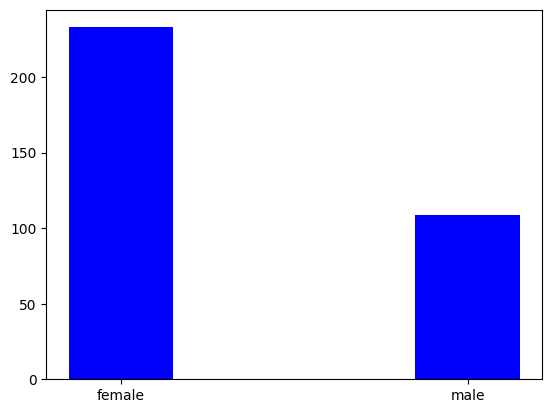

In [72]:
plt.bar(pivot_1.index, pivot_1.Survived, width=0.3, align='center', color='Blue')

In [73]:
pivot_2 = pd.pivot_table(data=data, values='Fare', index='Pclass', aggfunc='mean')
pivot_2

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


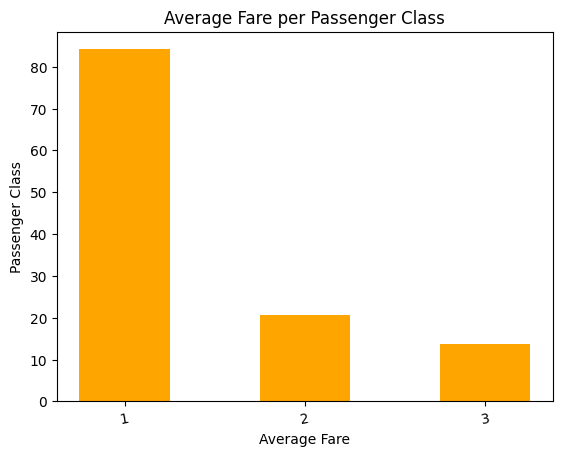

In [78]:
plt.bar(pivot_2.index, pivot_2.Fare, width=0.5, align='center', color='Orange')
plt.xticks(pivot_2.index, rotation=10)
plt.xlabel('Average Fare')
plt.ylabel('Passenger Class')
plt.title('Average Fare per Passenger Class')
plt.show()

In [79]:
data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

# Pie Chart

In [190]:
pie_1 = (data.Pclass.value_counts() / data.Pclass.value_counts().sum()).to_dict()
pie_1

{3: 0.5510662177328844, 1: 0.24242424242424243, 2: 0.20650953984287318}

In [98]:
labels = [x for x in pie_1.keys()]
values = [x*100 for x in pie_1.values()]

In [100]:
labels, values

([3, 1, 2], [55.106621773288445, 24.242424242424242, 20.65095398428732])

([<matplotlib.patches.Wedge at 0x2a03108ce90>,
 [Text(-0.17571619097547903, 1.085874679799225, '3'),
  Text(-0.5160760536623383, -0.9714244730478574, '1'),
  Text(0.8765111790709129, -0.6646263258130227, '2')])

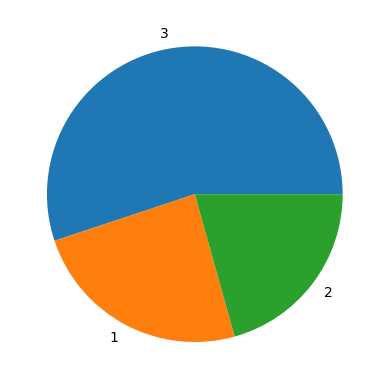

In [101]:
plt.pie(x=values, labels=labels)

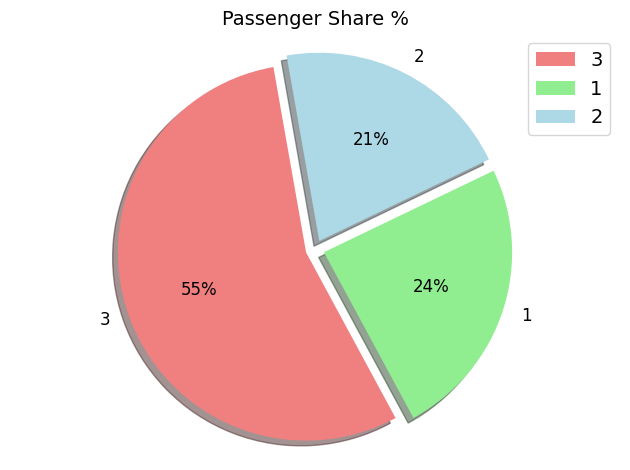

In [138]:
plt.pie(x=values, labels=labels,
        autopct='%0.0f%%',
        explode=[0.05, 0.05, 0.05],
        startangle=100,
        colors=['lightcoral', 'lightgreen', 'lightblue'],
		textprops={'fontsize': 12},
        shadow=True
        )
plt.title("Passenger Share %", fontsize=14)
plt.tight_layout()
plt.axis('equal')
plt.legend(loc=1, prop={'size': 14})

# Box Plot

In [ ]:
# Getting fares for each pclass (iterative method)

pClass = data['Pclass'].value_counts()
pclass_fare={}
for i in range(0,len(pClass)):
	x = pClass.index[i]
	pclass_fare[x] = data[data.Pclass == x] ['Fare']

In [ ]:
# df slicing (simple)

pclasses = data.Pclass.unique()
fares = [data[data.Pclass==i]['Fare'] for i in pclasses]

C:\Users\vishw\AppData\Local\Temp\ipykernel_24432\1045495813.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x=fares, labels=pclasses)


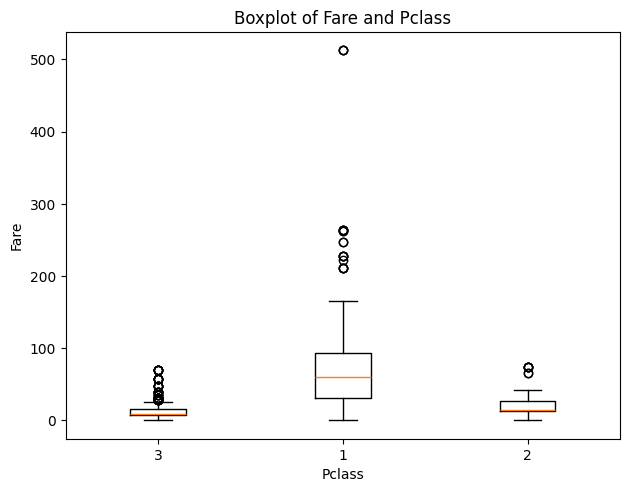

In [ ]:
plt.boxplot(x=fares, labels=pclasses)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.tight_layout()
plt.title('Boxplot of Fare and Pclass')
plt.show()

# Histogram

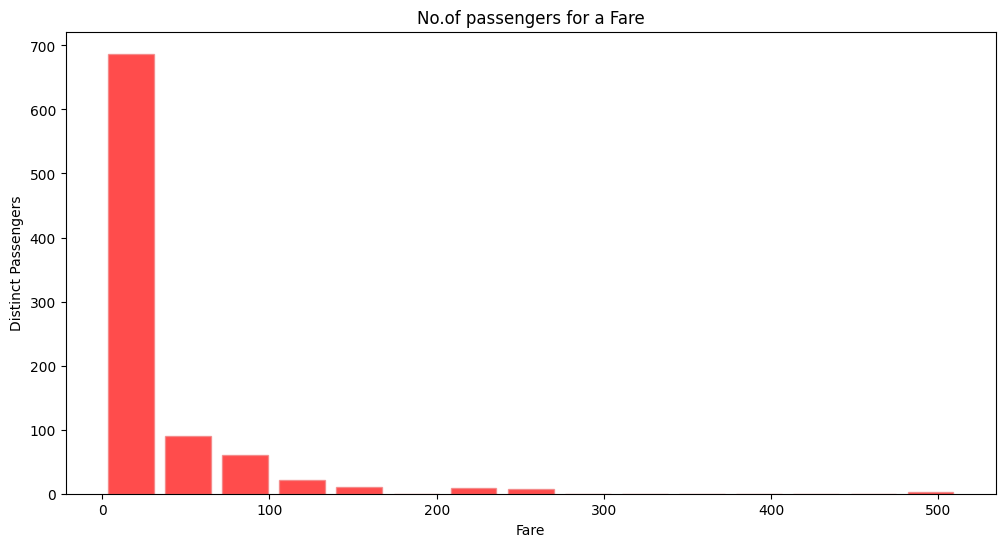

In [231]:
plt.figure(figsize=(12, 6))
plt.hist(x=data.Fare, 
         bins=15,
         rwidth=0.8, alpha=0.7,
         color='red', edgecolor='lightcoral'
        )
plt.xlabel('Fare')
plt.ylabel('Distinct Passengers')
plt.title('No.of passengers for a Fare')
plt.show()

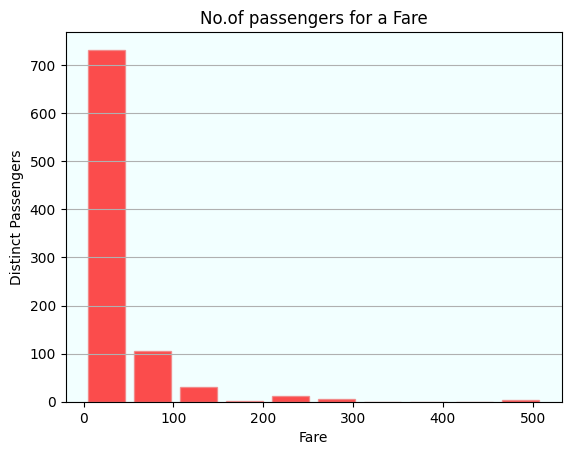

In [234]:
# Creating a figure and axes

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor((0.95, 1, 1))
ax.grid('both', axis='y')
plt.hist(x=data.Fare, 
         bins=10,
         rwidth=0.8, alpha=0.7,
         color='red', edgecolor='lightcoral'
        )
plt.xlabel('Fare')
plt.ylabel('Distinct Passengers')
plt.title('No.of passengers for a Fare')
plt.show()

# Line Plot

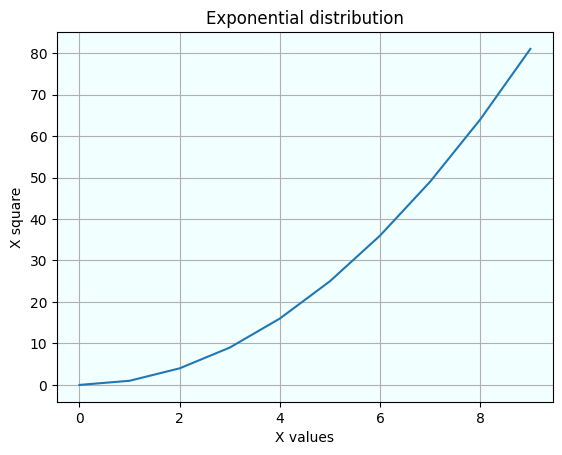

In [ ]:
x = range(10)
sin_x = [math.sin(i) for i in x]
x_sqr = [i**2 for i in x]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor((0.95, 1.0, 1.0))
ax.grid('both')
plt.plot(x,x_sqr)
plt.xlabel('X values')
plt.ylabel('X square')
plt.title('Exponential distribution')
plt.show()

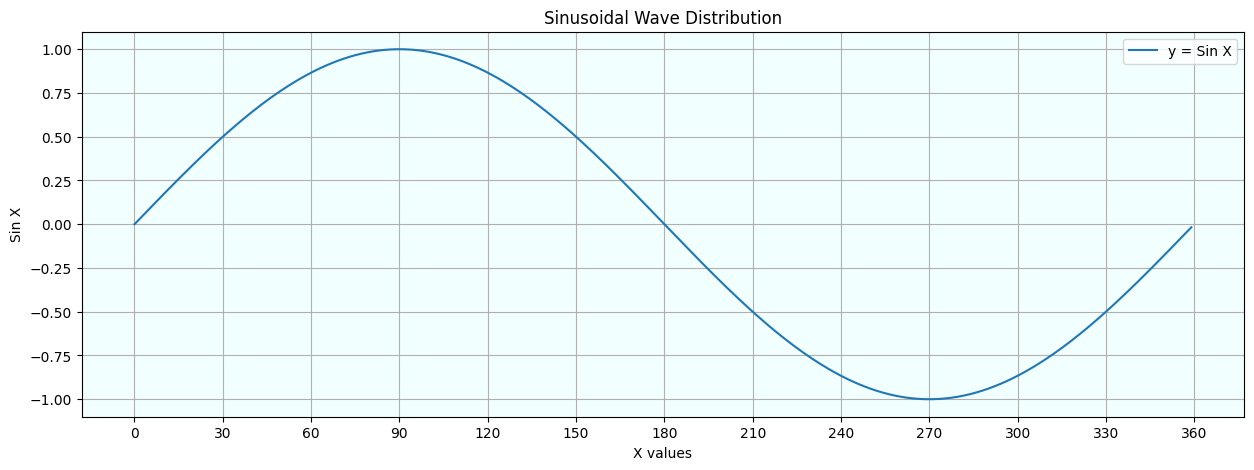

In [286]:
x = np.arange(0, 360)
x_ticks = range(0, 361, 30)
sin_x = [math.sin(math.radians(i)) for i in x]

fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor((0.95, 1.0, 1.0))
ax.grid('both')
ax.plot(x,sin_x, label='y = Sin X')
plt.xticks(x_ticks)
plt.xlabel('X values')
plt.ylabel('Sin X')
plt.title('Sinusoidal Wave Distribution')
plt.legend()
plt.show()

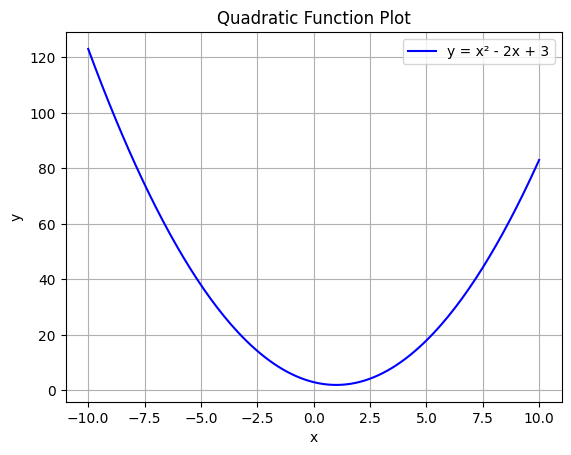

In [269]:
x = np.linspace(-10, 10, 200)

# Quadratic function: y = ax^2 + bx + c
a, b, c = 1, -2, 3
y = a * x**2 + b * x + c

# Plot
plt.plot(x, y, color='blue', label='y = x² - 2x + 3')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Function Plot")
plt.grid(True)
plt.legend()
plt.show()

# Scatter plot

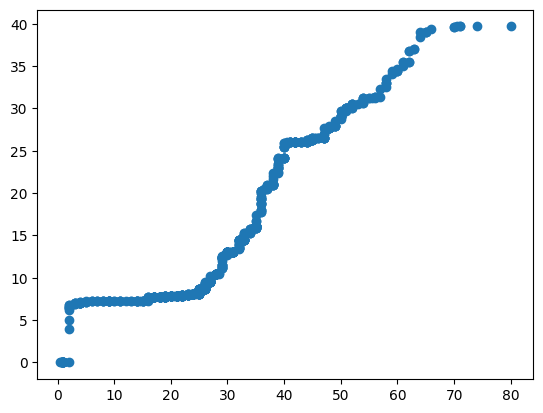

In [292]:
x = data.sort_values(by='Age', ascending=True)['Age']
y = data.sort_values(by='Fare', ascending=True)['Fare']

plt.scatter(x, y)

In [295]:
data = sns.load_dataset('titanic')

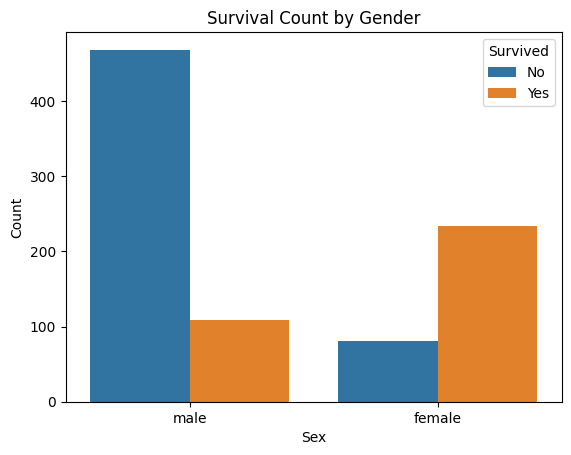

In [ ]:
# Countplot (e.g., survivors by gender)

sns.countplot(x='sex', hue='survived', data=data)
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

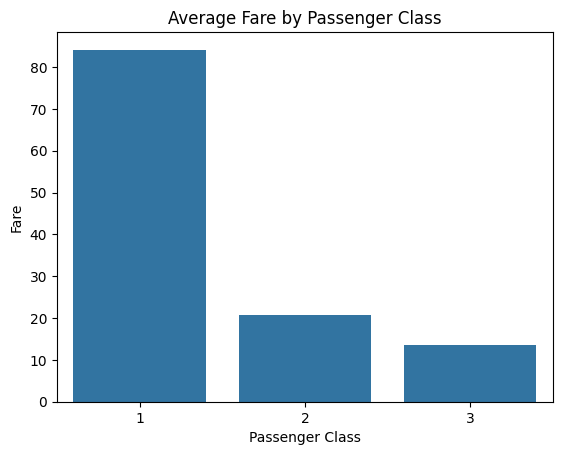

In [ ]:
# Barplot (e.g., average fare per class)

sns.barplot(x='pclass', y='fare', data=data, errorbar=None)
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

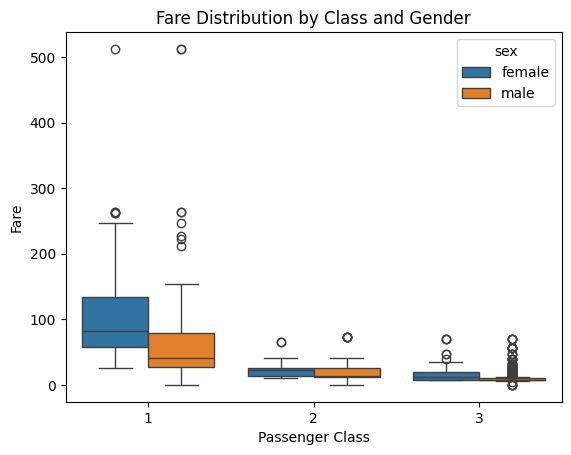

In [ ]:
# Boxplot (e.g., fare distribution by class and sex)

sns.boxplot(x='pclass', y='fare', hue='sex', data=data)
plt.title('Fare Distribution by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

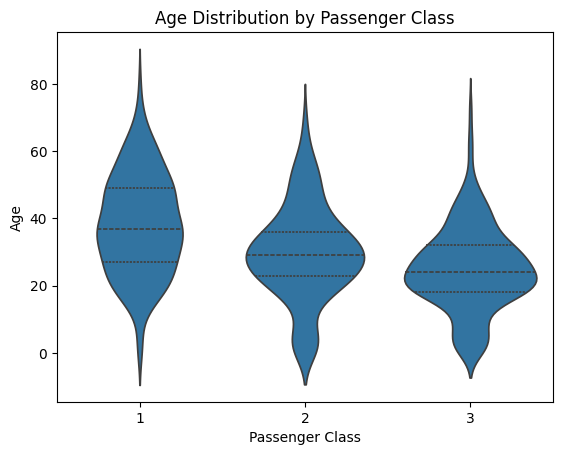

In [ ]:
# Violin Plot (e.g., age distribution by class)

sns.violinplot(x='pclass', y='age', data=data, inner='quartile')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

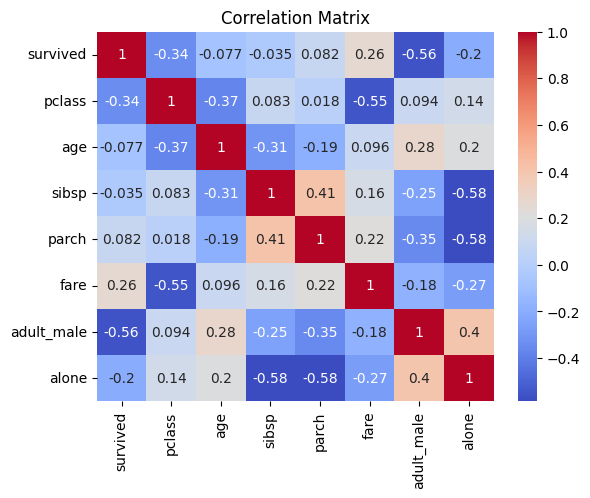

In [ ]:
# Heatmap of Correlations

corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

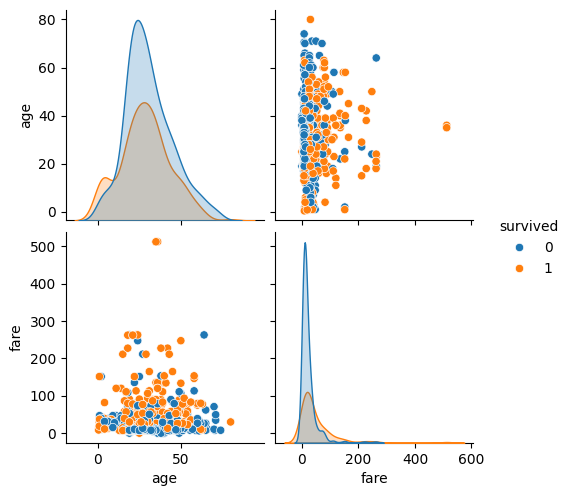

In [ ]:
# Pairplot (e.g., age vs fare vs survived)

sns.pairplot(data[['age', 'fare', 'survived']], hue='survived')
plt.show()

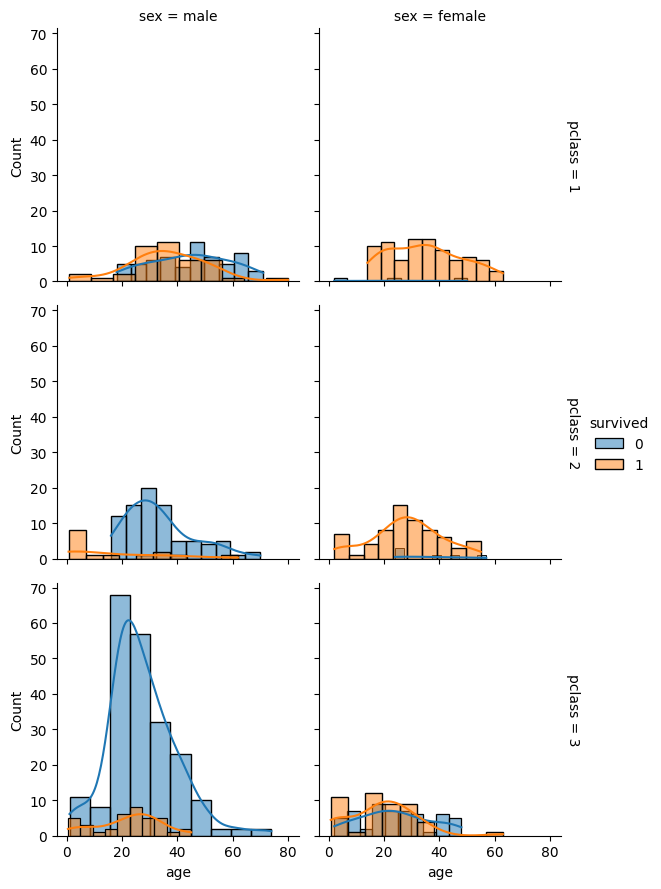

In [ ]:
# FacetGrid (e.g., survival distribution by gender and class)

g = sns.FacetGrid(data, col='sex', row='pclass', hue='survived', margin_titles=True)
g.map_dataframe(sns.histplot, x='age', bins=10, kde=True)
g.add_legend()
plt.show()

In [307]:
employees_dict = {
	'emp_id': [1, 2, 3, 4, 5],
	'emp_name': ['Joe', 'Jim', 'Henry', 'Sam', 'Max'],
	'salary': [70000, 90000, 80000, 60000, 90000],
	'dept_id': [1, 1, 2, 2, 1]
}
departments_dict = {
	'dept_id': [1, 2],
	'dept_name': ['IT', 'Sales']
}
employee = pd.DataFrame(employees_dict)
department = pd.DataFrame(departments_dict)

In [308]:
employee

,emp_id,emp_name,salary,dept_id
0,1,Joe,70000,1
1,2,Jim,90000,1
2,3,Henry,80000,2
3,4,Sam,60000,2
4,5,Max,90000,1


In [309]:
department

,dept_id,dept_name
0,1,IT
1,2,Sales


In [311]:
final_tbl = pd.merge(left=department, right=employee, on='dept_id', how='right')
final_tbl

,dept_id,dept_name,emp_id,emp_name,salary
0,1,IT,1,Joe,70000
1,1,IT,2,Jim,90000
2,2,Sales,3,Henry,80000
3,2,Sales,4,Sam,60000
4,1,IT,5,Max,90000


In [353]:
final_tbl_copy = final_tbl.copy()
final_tbl_copy['rank']=final_tbl_copy.groupby(['dept_id'])['salary'].rank(method='first', ascending=False)
final_tbl_copy[final_tbl_copy['rank']==1][:]

,dept_id,dept_name,emp_id,emp_name,salary,rank
1,1,IT,2,Jim,90000,1.0
2,2,Sales,3,Henry,80000,1.0


In [ ]:
# Get the highest salaried employee from each department
'''
SELECT * FROM (
SELECT 
	department.name,
    employee.id,
    employee.salary,
	DENSE_RANK() (partition by employee.departmentId order by employee.salary desc) as myrank
FROM employee
INNER JOIN department ON employee.departmentId = department.id
)a
WHERE a.myrank==1
'''

In [374]:
## Method 1
final_tbl_copy = final_tbl.copy()
final_tbl_copy['rank'] = final_tbl_copy.groupby('dept_id') ['salary'].rank(method='first', ascending=False)
final_tbl_copy[final_tbl_copy['rank']==1][['dept_name', 'emp_name', 'salary']]

,dept_name,emp_name,salary
1,IT,Jim,90000
2,Sales,Henry,80000


In [375]:
final_tbl_copy = final_tbl.copy()
final_tbl_copy.groupby(['dept_id'])['salary'].max().reset_index()

,dept_id,salary
0,1,90000
1,2,80000


In [376]:
final_tbl_copy = final_tbl.copy()
final_tbl_copy.iloc[final_tbl_copy.groupby(['dept_id'])['salary'].idxmax()]

,dept_id,dept_name,emp_id,emp_name,salary
1,1,IT,2,Jim,90000
2,2,Sales,3,Henry,80000


In [394]:
data = {'num': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 5,5,6,6,7,7,7]}
logs = pd.DataFrame(data)
logs

,num
0,1
1,1
2,1
3,2
4,2
5,2
6,3
7,3
8,3
9,4


In [ ]:
data = pd.DataFrame(np.random.randint(0, 10, 20), columns=['nums'])
data

In [405]:
logs.num.rolling(window=3).mean()

0          NaN
1          NaN
2     1.000000
3     1.333333
4     1.666667
5     2.000000
6     2.333333
7     2.666667
8     3.000000
9     3.333333
10    4.000000
11    4.666667
12    5.000000
13    5.333333
14    5.666667
15    6.333333
16    6.666667
17    7.000000
Name: num, dtype: float64

In [406]:
logs.num.rolling(window=3, center=True).mean()

0          NaN
1     1.000000
2     1.333333
3     1.666667
4     2.000000
5     2.333333
6     2.666667
7     3.000000
8     3.333333
9     4.000000
10    4.666667
11    5.000000
12    5.333333
13    5.666667
14    6.333333
15    6.666667
16    7.000000
17         NaN
Name: num, dtype: float64

In [402]:
logs['is_consec'] = logs['num'].rolling(window=3, min_periods=3, center=False).apply(lambda x: x.nunique()==1)

In [403]:
logs

,num,is_consec
0,1,NaN
1,1,NaN
2,1,1.0
3,2,0.0
4,2,0.0
5,2,1.0
6,3,0.0
7,3,0.0
8,3,1.0
9,4,0.0


In [ ]:
logs = logs.drop_duplicates()

In [404]:
logs[logs.is_consec==1]

,num,is_consec
2,1,1.0
5,2,1.0
8,3,1.0
12,5,1.0
17,7,1.0
